'' was not found in history, as a file, url, nor in the user namespace.


 === Differences with :  [-1  0  1]
[ 1. -2.  1.]
  == dduh : -8.4076999e-01  (h = 1e-01)
  == order of the method :            2
  == denominator of the error :      12
  == estimated error :    8.3333333e-04
  == exact error :        7.0099212e-04


 === Differences with :  [-3 -2 -1  0]
[-1.  4. -5.  2.]
  == dduh : -8.4859022e-01  (h = 1e-01)
  == order of the method :            2
  == denominator of the error :      -1
  == estimated error :    9.1666667e-03
  == exact error :        7.1192313e-03


 === Differences with :  [-2 -1  0  1  2]
[-0.08333333  1.33333333 -2.5         1.33333333 -0.08333333]
  == dduh : -8.4147005e-01  (h = 1e-01)
  == order of the method :            4
  == denominator of the error :     -90
  == estimated error :    1.1111111e-06
  == exact error :        9.3413338e-07


 === Differences with :  [-4 -3 -2  0  1  2]
[ 0.06666667 -0.4         0.91666667 -1.5         0.93333333 -0.

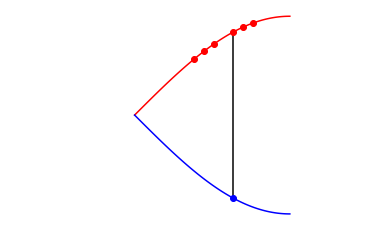

In [66]:
%save ../diff.py
from numpy import *
from math  import factorial
from numpy.linalg import solve
from matplotlib import pyplot as plt

eps = finfo('float').eps
 
#
# TOUTE AUTRE INSTRUCTION CONTENANT import / from SERA AUTOMATIQUEMENT SUPPRIMEE
#
 
def doublePrime(alpha):

    #
    # A MODIFIER ..... [begin]
    #
    n = len(alpha)
    b = zeros(n)
    
    b[2] = 1
    
    A = empty((n,n))
    for i in range(n):
        A[i] = ((alpha)**i)/factorial(i)
    
    beta = solve(A,b)
    E = sum(abs(dot(A,beta) - b)) * dot(abs(beta), abs(alpha**n)) 
    
    print(beta)
    if abs((dot(beta,alpha**n)))<=E: 
        factor = factorial(n+1)/(dot(beta,alpha**(n+1)))
        order = n-1
    else:
        factor = factorial(n)/(dot(beta,alpha**(n)))
        order = n-2
        

    #
    # A MODIFIER ..... [end]
    #

    return beta,factor,order

 

 
 
#
# -1- Calcul de la derivee seconde de sin(1)
#     C'est facile : c'est -sin(1) :-)
#
 
x   = 1.0
u   = sin(x)
ddu = -u
  
#    
# -2- Quelques exemples de formules de differences finies
#
 
trials = [[-1, 0, 1],
          [-3,-2,-1, 0],
          [-2,-1, 0, 1, 2],
          [-4,-3,-2, 0, 1, 2]]

#trials = [[-3,-2,-1, 0]]

for iTrial in trials:
    alpha = array(iTrial)
    print("\n")
    print(" === Differences with : ",alpha)

    #
    # -2.1- Calcul des coefficients
    #       Calcul de l'ordre de precision et du denominateur de l'erreur

    beta,gamma, order = doublePrime(alpha)

    #    
    # -2.2- Application de la formule avec h = 0.1
    #       Comparaison erreur analytique et erreur estimee

    h = 0.1
    X = x + alpha*h
    U = sin(X)
    #beta = array([-100,400,-500,200])
    dduh = (U @ beta) / h**2
    eh = abs(h**order / gamma)

    print("  == dduh : %14.7e  (h = %5.0e)" % (dduh,h))
    print("  == order of the method : %12d" % order)
    print("  == denominator of the error :  %6.0f" % gamma)
    print("  == estimated error :   %14.7e" % eh)
    print("  == exact error :       %14.7e" % abs(dduh-ddu) )
    
#
# -2.3- Joli plot
#
 
xplot = linspace(0,pi/2,100);
uplot = sin(xplot);
dduplot = -uplot
    
plt.figure("Differences with " + str(alpha))
plt.plot(xplot,uplot,'-r')
plt.plot(xplot,dduplot,'-b')
plt.plot([x,x],[u,ddu],'-k')
plt.plot(X,U,'or')
plt.plot(x,dduh,'ob')
plt.axis('equal')
plt.axis('off')
plt.show()
